**Project: A diabetes prediction machine learning project involves using advanced algorithms to analyze patient data and identify individuals at high risk of developing diabetes**

**Import Library**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


** Import Dataset **

In [7]:
from google.colab import files
import io

uploaded = files.upload()

filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Saving diabetes.csv to diabetes (3).csv
Uploaded file: diabetes (3).csv
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------          

** Data Preprocessing(Missing Value Replesing using Median Value) **

In [8]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_replace:
    median_value = df[col][df[col] != 0].median()
    df[col] = df[col].replace(0, median_value)

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

print("\nUpdated Summary Statistics:")
print(df.describe())



Number of missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Updated Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122

**Data Visualization**

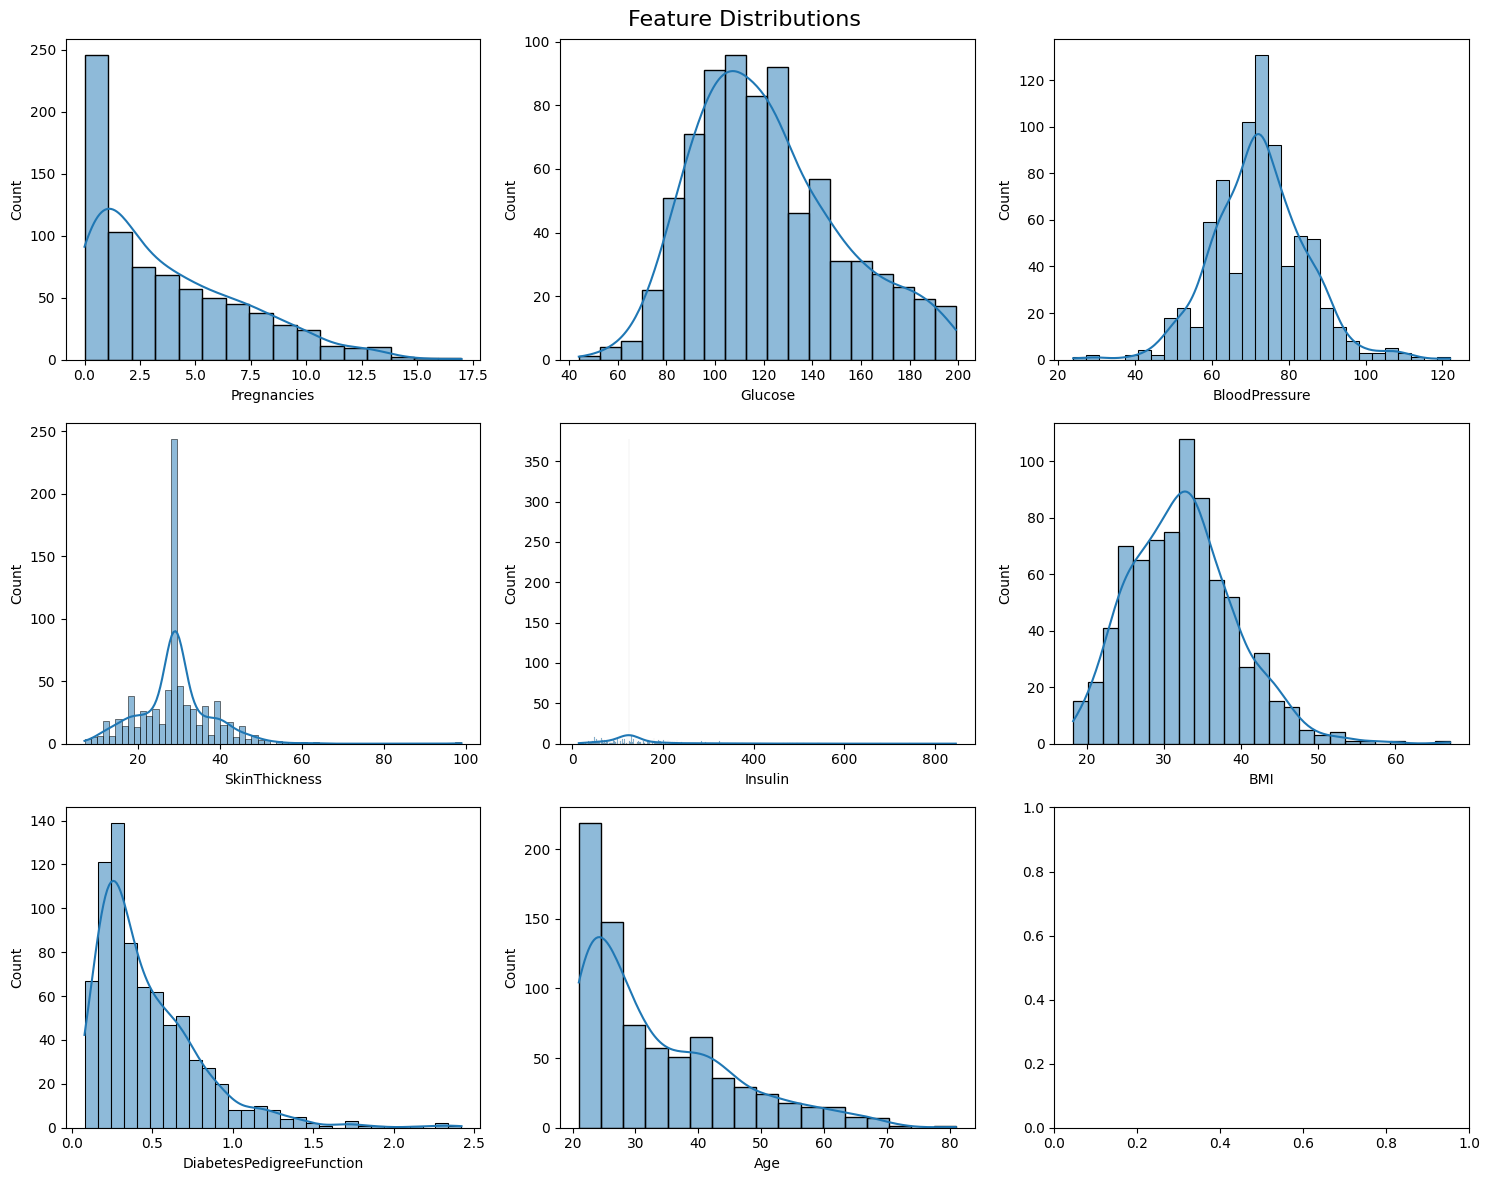

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Feature Distributions', fontsize=16)

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for i, feature in enumerate(features[:-1]):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

** Correlation Matrix among different features **

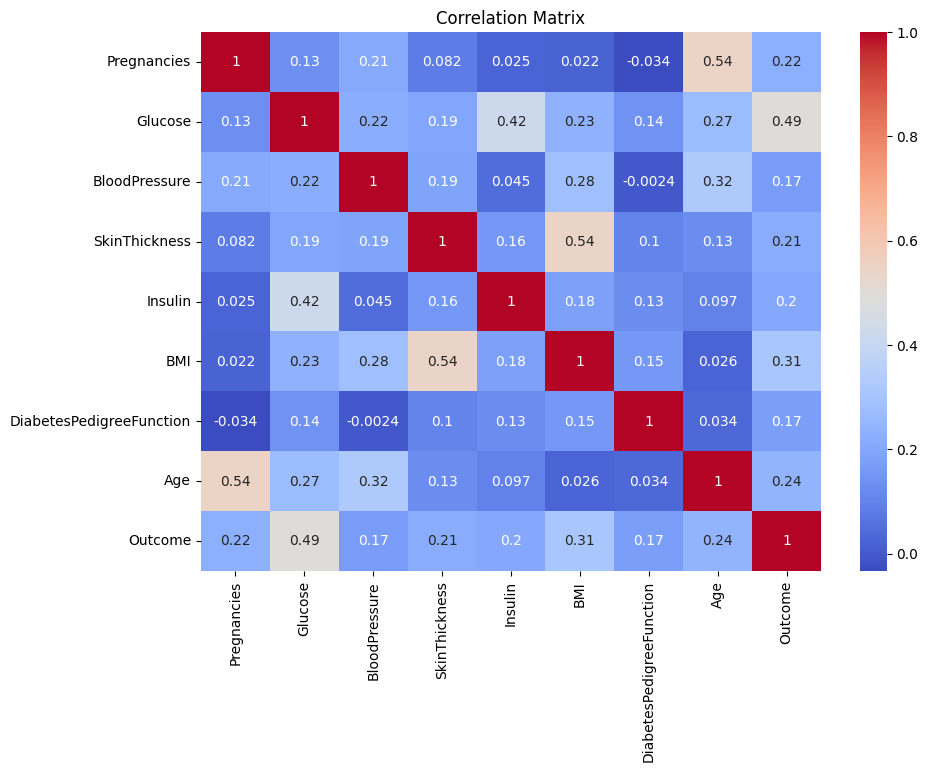

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Feature Scaling**

In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling completed. Shape of training and test sets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Feature scaling completed. Shape of training and test sets:
X_train: (614, 8), y_train: (614,)
X_test: (154, 8), y_test: (154,)


**FNN Model Architechture**

In [12]:
model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Neural Network Architecture:")
model.summary()


Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

**Model Traning**

In [13]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5833 - loss: 0.6506 - val_accuracy: 0.6992 - val_loss: 0.5188
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7714 - loss: 0.4772 - val_accuracy: 0.7398 - val_loss: 0.4735
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7607 - loss: 0.4605 - val_accuracy: 0.7561 - val_loss: 0.4624
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4482 - val_accuracy: 0.7561 - val_loss: 0.4550
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.4210 - val_accuracy: 0.7398 - val_loss: 0.4554
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.4755 - val_accuracy: 0.7480 - val_loss: 0.4610
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.4049 - val_accuracy: 0.7561 - val_loss: 0.4556
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.4256 - val_accuracy: 0.7642 - val_loss

**Performance Visualization**

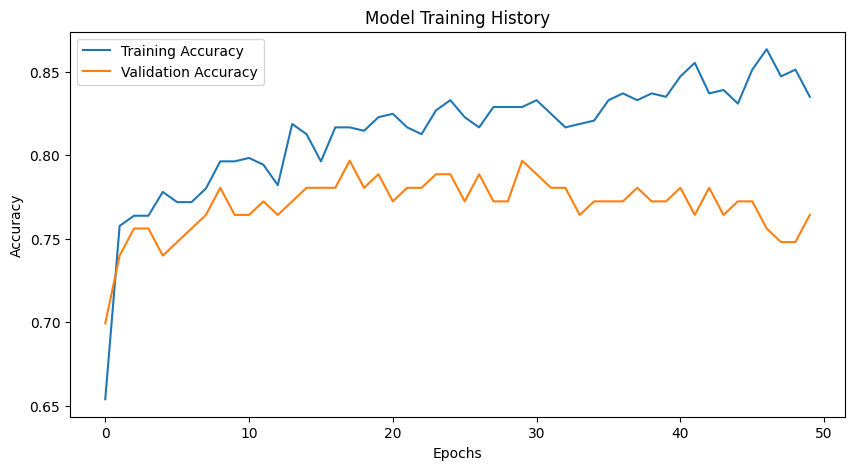

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Perfomance Matrix**

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7051 - loss: 0.6425
Test Loss: 0.6435
Test Accuracy: 0.7338
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        99
           1       0.63      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



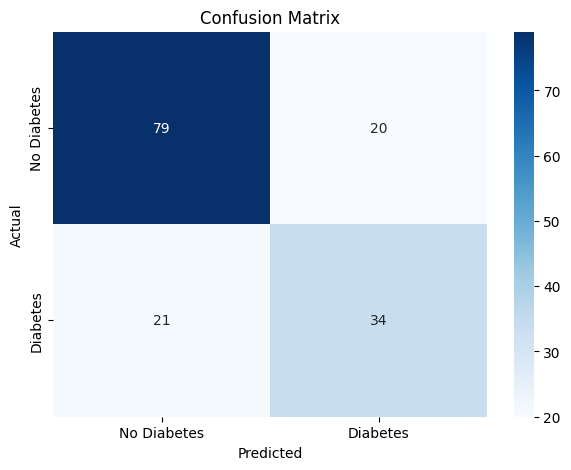

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


**Class Distribution**

Outcome
0    500
1    268
Name: count, dtype: int64


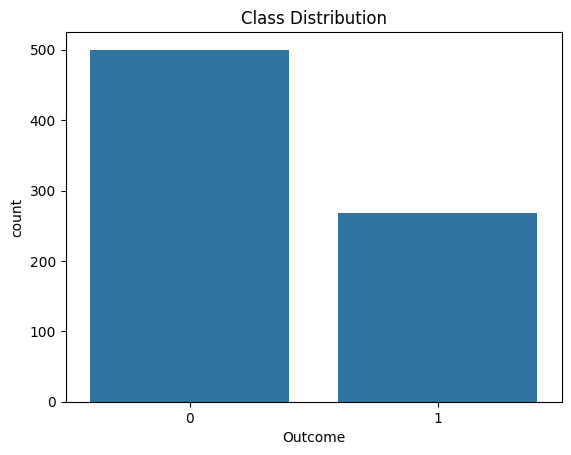

In [17]:
print(df['Outcome'].value_counts())

sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")
plt.show()


**Dataset Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Selecting best Perameter from model traing and performance evaluation using keras-tuner**

In [19]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [20]:
import keras_tuner as kt
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X.shape[1],)))

    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.001, 0.01, 0.1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuner_dir',
    project_name='diabetes_tuning'
)

tuner.search(X_scaled, y, epochs=20, validation_split=0.2, verbose=1)

best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 01m 20s


**Updated Heatmap after feature scaling and Weight Distributing**

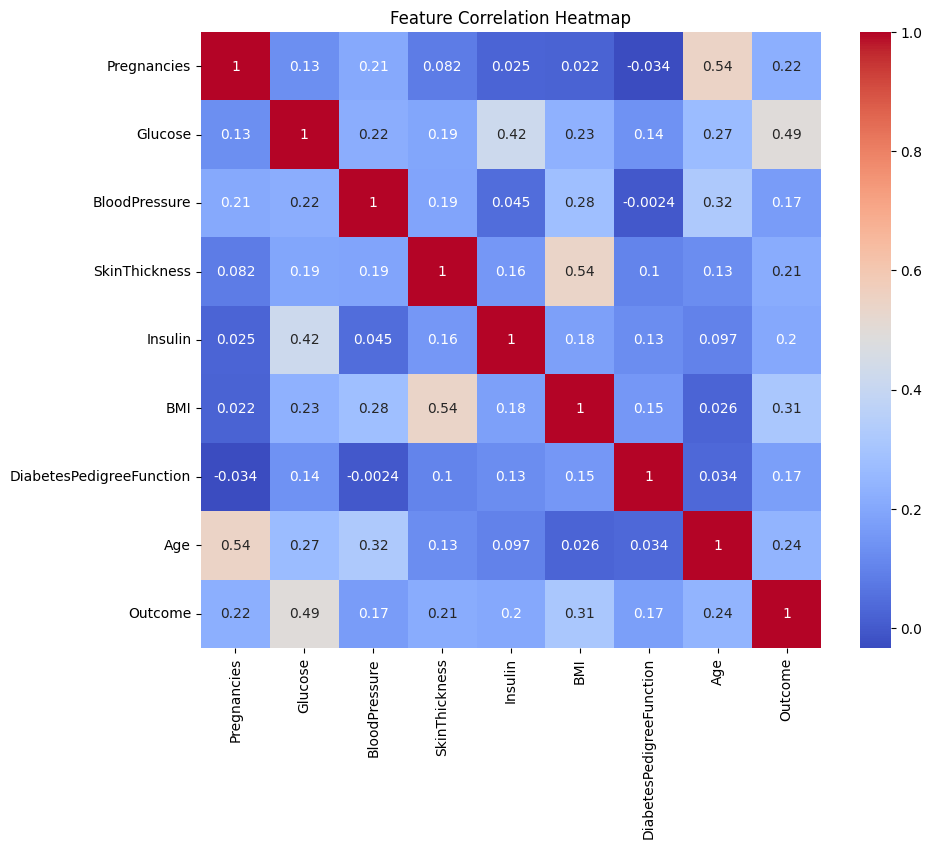

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


**Addressing imbalance class using distributed Class Weight**

In [22]:
from sklearn.utils import class_weight
import numpy as np

classes = np.array([0, 1])
class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y)
class_weights_dict = {classes[i]: class_weights[i] for i in range(len(classes))}

print("Class Weights: ", class_weights_dict)

Class Weights:  {0: 0.768, 1: 1.4328358208955223}


**Updated Model Train using Updated feature scaling,updated weight,updated parameter**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(256, input_shape=(X.shape[1],)),
    LeakyReLU(alpha=0.1),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)
]
history = model.fit(X_scaled, y,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks,
                    class_weight=class_weights_dict)





Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.7146 - loss: 0.6003 - val_accuracy: 0.7597 - val_loss: 0.4800 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.4746 - val_accuracy: 0.7662 - val_loss: 0.4968 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 0.4596 - val_accuracy: 0.7727 - val_loss: 0.4786 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7791 - loss: 0.4591 - val_accuracy: 0.7792 - val_loss: 0.4713 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.4295 - val_accuracy: 0.7662 - val_loss: 0.4838 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8245 - loss: 0.4034 - val_accuracy: 0.7857 - val_loss: 0.4748 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.4227 - val_ac

**Model Performance Visualization**

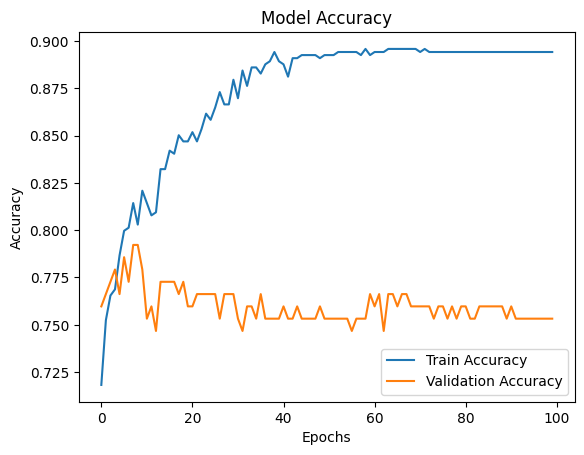

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Updated Confusion Matrix**

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


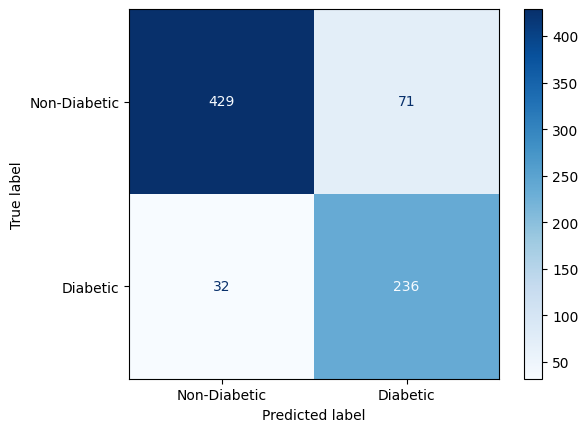

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = (model.predict(X_scaled) > 0.5).astype("int32")
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.show()
